In [1]:
from fairness.matching import compute
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from fairness.pre_processing import categorical_to_numeric_converter
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./dataset/adult.data', sep=',')

In [3]:
dataset = categorical_to_numeric_converter(dataset)

In [4]:
dataset.rename(columns={" <=50K": "50K"}, inplace=True)

In [5]:
output_column = "50K"

In [6]:
X = dataset.iloc[:,:len(dataset.columns) - 2]
y = dataset.loc[:, output_column:]

In [7]:
X

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40
0,50,6,83311,9,13,2,4,0,4,1,0,0,13
1,38,4,215646,11,9,0,6,1,4,1,0,0,40
2,53,4,234721,1,7,2,6,0,2,1,0,0,40
3,28,4,338409,9,13,2,10,5,2,0,0,0,40
4,37,4,284582,12,14,2,4,5,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
standard_scaler_train = StandardScaler()
X_train = standard_scaler_train.fit_transform(X_train)

standard_scaler_test = StandardScaler()
X_test = standard_scaler_test.fit_transform(X_test)

In [10]:
model = GaussianNB()
model.fit(X_train, y_train)

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4704  208]
 [1040  560]]
0.8083538083538083
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4912
           1       0.73      0.35      0.47      1600

    accuracy                           0.81      6512
   macro avg       0.77      0.65      0.68      6512
weighted avg       0.80      0.81      0.78      6512



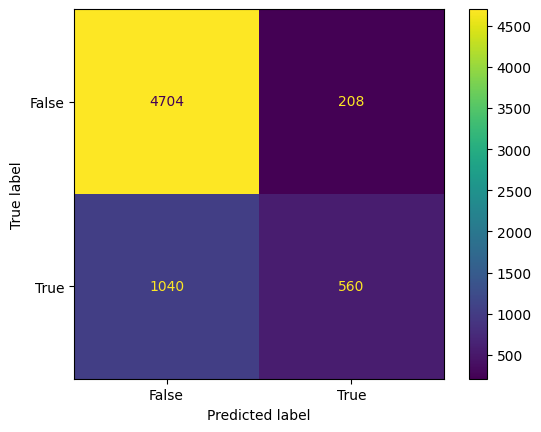

In [13]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[False, True])
cm_display.plot()
plt.show()